In [1]:
## SYMBOLIC CALCULATION
import sympy as sym
import numpy as np
from sympy import *
import scipy.optimize
import matplotlib.pyplot as plt

## Constants

In [2]:
Ct = .1 # uiuc propeller testing at low advance ratio https://m-selig.ae.illinois.edu/props/propDB.html
rho = 1.23 #kg/m^2
D = .2 # meters This is the diameter of the propeller
Cq = 4*10**-3 # Coeficient of Torque https://arc.aiaa.org/doi/epdf/10.2514/6.2015-3296

k = Ct*rho*D**4 *(2*np.pi)
b = Cq*rho*D**5  *(2*np.pi)
k = 0.0001968  # Lift constant in newtons per (radian/second)**2
b = 9.892246947623543e-06 # torque per (radian/second) ^2

# Constants
m = .6945 # Mass of the drone (kg)
g = -9.81  # Acceleration due to gravity (m/s^2)
l = 0.45/2. # Radius of rotor to COG
I_xx = 0.01349  # Moment of inertia about x-axis
I_yy = 0.01349  # Moment of inertia about y-axis
I_zz = .02681 # Moment of inertia about z-axis
I_m = 1.6817e-05 # Moment of inertia of the rotor

## Efficiency

In [3]:
def efficiency(tau):
  return .7

## Initial Conditions

In [4]:
# Initial conditions
x0 = 0.0  # Initial x position
y0 = 0.0  # Initial y position
z0 = 0.0  # Initial z position (hovering at 2 meters)
vx0 = 0.0  # Initial velocity along x-axis
vy0 = 0.0  # Initial velocity along y-axis
vz0 = 0.0  # Initial velocity along z-axis
phi0 = 0.0  # Initial roll angle
theta0 = 0.0  # Initial pitch angle
psi0 = 0.0  # Initial yaw angle
omega_x0 = 0.0  # Initial angular velocity about x-axis
omega_y0 = 0.0  # Initial angular velocity about y-axis
omega_z0 = 0.0  # Initial angular velocity about z-axis

omega_m1_0 = 0.  # Initial rotor angular velocity 1
omega_m2_0 = 0.  # Initial rotor angular velocity 2
omega_m3_0 = 0.  # Initial rotor angular velocity 3
omega_m4_0 = 0.  # Initial rotor angular velocity 4

energy_total = 0. # power consumed in joules

# Building the Controller

In [5]:
x, y, z, vx, vy, vz, phi, theta, psi , omega_x,omega_y, omega_z,omega_m1 ,omega_m2, omega_m3, omega_m4 = symbols('x, y, z, vx, vy, vz, phi, theta, psi , omega_x,omega_y, omega_z, omega_m1 ,omega_m2, omega_m3, omega_m4')
tau_m1,tau_m2,tau_m3,tau_m4 = symbols('tau_m1,tau_m2,tau_m3,tau_m4')

states = [x, y, z, vx, vy, vz, phi, theta, psi, omega_x,omega_y, omega_z, omega_m1, omega_m2, omega_m3, omega_m4]
inputs = [tau_m1,tau_m2,tau_m3,tau_m4]

F  = Matrix([vx, vy, vz,
            k*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
           -k*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
           (g*m + k*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)*cos(phi)*cos(theta))/m,
            omega_x,omega_y, omega_z,
           (-I_xx*I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi)*tan(theta) - I_xx*I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi)*tan(theta) - I_yy*I_zz*k*l*(omega_m2**2 - omega_m4**2))/(I_xx*I_yy*I_zz),
           (I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*sin(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*cos(phi))/(I_yy*I_zz),
           (-I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi))/(I_yy*I_zz*cos(theta)),
           (-b*omega_m1**2 + tau_m1)/I_m,
           (-b*omega_m2**2 + tau_m2)/I_m,
           (-b*omega_m3**2 + tau_m3)/I_m,
           (-b*omega_m4**2 + tau_m4)/I_m]).T

# find equalibrium
Fe = F.subs({x : 0,y : 0 , z : 0,vx : 0,vy : 0, vz : 0,  phi : 0, theta : 0, psi : 0, omega_x:0 ,omega_y:0 , omega_z:0})
eq = Eq(Fe[5],0)
eq1 = Eq(Fe[6],0)
eq2 = Eq(Fe[7],0)
eq3 = Eq(Fe[8],0)
eq4 = Eq(Fe[12],0)
eq5 = Eq(Fe[13],0)
eq6 = Eq(Fe[14],0)
eq7 = Eq(Fe[15],0)
eq8 = Eq(tau_m1, tau_m2)
eq9 = Eq(tau_m3, tau_m4)
eq10 = Eq(tau_m1, tau_m3)
solution = solve([eq,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10])[15]
print(solution)

{omega_m1: 93.0310849898583, omega_m2: 93.0310849898583, omega_m3: 93.0310849898583, omega_m4: 93.0310849898583, tau_m1: 0.0856152484823067, tau_m2: 0.0856152484823067, tau_m3: 0.0856152484823067, tau_m4: 0.0856152484823067}


In [6]:
subsitution1 = solution
subsitution2 = {x : 0,y : 0 , z : 0,vx : 0,vy : 0, vz : 0,  phi : 0, theta : 0, psi : 0, omega_x:0 ,omega_y:0 , omega_z:0}
Fe = Fe.subs(subsitution1).subs(subsitution2)
print(Fe)
A = F.jacobian(states)
B = F.jacobian(inputs)
A = F.jacobian(states)
B = F.jacobian(inputs)
A = A.subs(subsitution1).subs(subsitution2)
B = B.subs(subsitution1).subs(subsitution2)
A = np.array(A).astype(float)
B = np.array(B).astype(float)
inputs_e  =  np.array(Matrix(inputs).subs(subsitution1).subs(subsitution2)).astype(float)
state_e  = np.array(Matrix(states).subs(subsitution1).subs(subsitution2)).astype(float)
print(inputs_e)

Matrix([[0, 0, 0, 0, 0, -8.88178419700125e-15, 0, 0, 0, 0, 0, 0, 2.72848410531878e-12, 2.72848410531878e-12, 2.72848410531878e-12, 2.72848410531878e-12]])
[[0.08561525]
 [0.08561525]
 [0.08561525]
 [0.08561525]]


In [7]:
def LQR(A, B, Q, R):
    P = scipy.linalg.solve_continuous_are(A, B, Q, R)
    K = np.linalg.inv(R) @  B.T @ P
    return K
#x, y, z, vx, vy, vz, phi, theta, , psi, omega_x, omega_y, omega_z ,omega_m1 ,omega_m2, omega_m3, omega_m4
Q = np.diag([10,10,200,1,1,1,1,1,100,1,1,1,1,1,1,1])
R = np.eye(4)*100
K = LQR(A, B, Q, R)

In [8]:
# Create the Controller class
class Controller():
    def __init__(self):
        pass
    def reset(self,state0):
        state = state0
        pass
    def run(self,state,state_desired):
       state_error = ((state).flatten()- (state_desired).flatten()  )
       tau = -K@state_error+ inputs_e.flatten()
       tau = np.clip(tau, -1, 1)
       tau_m1,tau_m2,tau_m3,tau_m4 = (tau[0]),(tau[1]),(tau[2]),(tau[3])
       return [tau_m1,tau_m2,tau_m3,tau_m4]
controller = Controller()

### plot function

In [9]:
def plot(state_out, t, last = false):
    fig = plt.figure()
    fig = plt.figure(figsize=(8, 6))
    x = state_out[:, 0]
    y = state_out[:, 1]
    z = state_out[:, 2]
    ax = fig.add_subplot(111, projection='3d')  # Changed subplot to 111
    sc = ax.scatter(x, y, z, c=t, cmap='viridis')
    ax.set_xlabel('X-axis (meters)')
    ax.set_ylabel('Y-axis (meters)')
    ax.set_zlabel('Z-axis (meters)')
    cbar = fig.colorbar(sc)  # Added colorbar
    cbar.set_label('Time (seconds)')
    ax.set_xlim([0, 5])
    ax.set_ylim([0, 5])
    ax.set_zlim([0, 1])
    plt.tight_layout()
    ax.scatter(0, 0, 0, color='red', marker='o', s=100, label='(0,0,0) ')
    ax.scatter(0, 0, 1, color='red', marker='o', s=100, label=' (0, 0, 1)')
    ax.scatter(5, 0, 1, color='red', marker='o', s=100, label=' (5, 0, 1)')
    ax.scatter(5, 5, 1, color='red', marker='o', s=100, label=' (5, 5, 1)')
    ax.scatter(5, 5, 0, color='red', marker='o', s=100, label=' (5, 5, 0)')
    plt.show()

    plt.plot(t, x, label='X meters')
    plt.plot(t, y, label='Y meters')
    plt.plot(t, z, label='Z meters')
    plt.xlabel('Time(s)')
    plt.ylabel('Distance(M)')
    plt.legend()
    plt.grid(True)
    plt.show()
    pass

# Testing the controller

## start from ground hover at 1 m

In [10]:
state_desired =np.array(
  [[0.        ],
   [0.        ],
   [1.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [93.0310849898583],
   [93.0310849898583],
   [93.0310849898583],
   [93.0310849898583]])

def derivs(state, K, state_desired = state_desired):
  x, y, z, vx, vy, vz, phi, theta,  psi, omega_x, omega_y, omega_z ,omega_m1 ,omega_m2, omega_m3, omega_m4 = (state)
  tau = controller.run(state, state_desired)
  tau_m1,tau_m2,tau_m3,tau_m4 =  tau
  F  = np.array([vx, vy, vz,
        k*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
       -k*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
       (g*m + k*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)*cos(phi)*cos(theta))/m,
        omega_x,omega_y, omega_z,
       (-I_xx*I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi)*tan(theta) - I_xx*I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi)*tan(theta) - I_yy*I_zz*k*l*(omega_m2**2 - omega_m4**2))/(I_xx*I_yy*I_zz),
       (I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*sin(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*cos(phi))/(I_yy*I_zz),
       (-I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi))/(I_yy*I_zz*cos(theta)),
       (-b*omega_m1**2 + tau_m1)/I_m,
       (-b*omega_m2**2 + tau_m2)/I_m,
       (-b*omega_m3**2 + tau_m3)/I_m,
       (-b*omega_m4**2 + tau_m4)/I_m]).astype(float)
  return F

<Figure size 640x480 with 0 Axes>

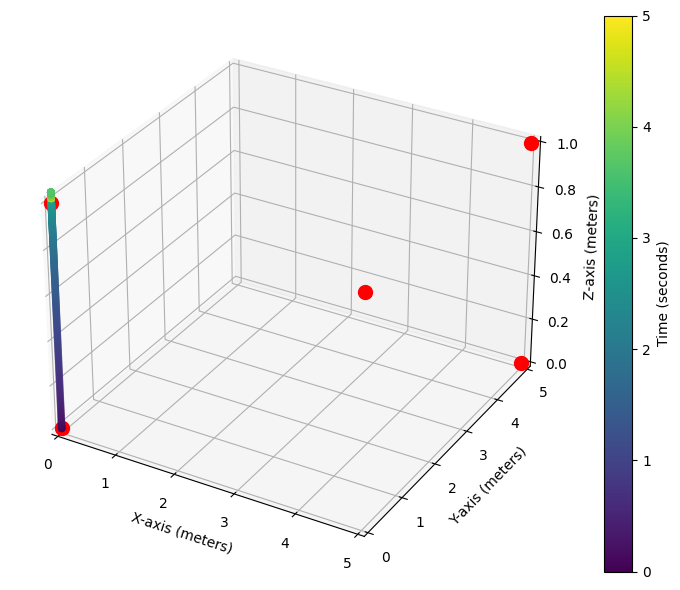

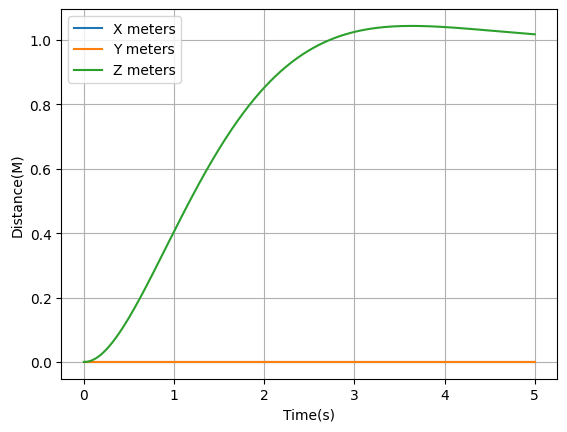

In [11]:
steps = 500
time = 5
t = np.linspace(0, time, steps)
state0 = [x0, y0, z0, vx0, vy0, vz0, phi0, theta0, psi0, omega_x0,omega_y0, omega_z0, omega_m1_0, omega_m2_0, omega_m3_0, omega_m4_0]
def sim(state0, t, derivs = derivs):
    controller.reset(state0)
    state_out = scipy.integrate.odeint(derivs, state0, t)
    x_out, y_out, z_out, vx_out, vy_out, vz_out, phi_out, theta_out, psi_out, omega_x_out, omega_y_out, omega_z_out, omega_m1_out, omega_m2_out, omega_m3_out, omega_m4_out  = state_out.T
    plot(state_out,t)
    return state_out, x_out, y_out, z_out, vx_out, vy_out, vz_out, phi_out, theta_out, psi_out, omega_x_out, omega_y_out, omega_z_out, omega_m1_out, omega_m2_out, omega_m3_out, omega_m4_out

state_out, x_out, y_out, z_out, vx_out, vy_out, vz_out, phi_out, theta_out, psi_out, omega_x_out, omega_y_out, omega_z_out, omega_m1_out, omega_m2_out, omega_m3_out, omega_m4_out = sim(state0,t)

In [12]:
def energy(state_out, state_desired, time, steps):
    power_total = 0
    energy = 0
    for i in range(len(x_out)):
        tau = controller.run(state_out[i], state_desired)
        tau_m1,tau_m2,tau_m3,tau_m4 =  tau
        power = (np.abs(tau_m1*omega_m1_out[i] / efficiency(tau_m1)) + np.abs(tau_m2*omega_m2_out[i] / efficiency(tau_m2))
        + np.abs(tau_m3*omega_m3_out[i] / efficiency(tau_m3)) + np.abs(tau_m4*omega_m4_out[i] / efficiency(tau_m4) ) )
        power_total += power
        energy = power_total * (time/steps)
    return energy

In [13]:
state_out[-1], energy_total + energy(state_out, state_desired, time, steps)

(array([-3.17439232e-15, -6.21412273e-15,  1.01763082e+00, -2.11719191e-15,
         2.95674569e-14, -2.14585518e-02,  5.61296784e-15, -2.36660894e-16,
         2.22333845e-15, -5.78777784e-15,  8.25837529e-16,  5.82944461e-15,
         9.30824700e+01,  9.30824700e+01,  9.30824700e+01,  9.30824700e+01]),
 227.05249002880393)

## Move Foreward 5m

In [14]:
state0 = state_out[-1]
energy_total =   energy(state_out, state_desired, time, steps)

In [15]:
def derivs(state, K):
  x, y, z, vx, vy, vz, phi, theta,  psi, omega_x, omega_y, omega_z ,omega_m1 ,omega_m2, omega_m3, omega_m4 = (state)
  state_desired  =np.array(
   [[state[0]+1.39],
   [0.        ],
   [1.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [93.0310849898583],
   [93.0310849898583],
   [93.0310849898583],
   [93.0310849898583]])
  tau = controller.run(state, state_desired)
  tau_m1,tau_m2,tau_m3,tau_m4 =  tau
  F  = np.array([vx, vy, vz,
        k*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
       -k*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
       (g*m + k*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)*cos(phi)*cos(theta))/m,
        omega_x,omega_y, omega_z,
       (-I_xx*I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi)*tan(theta) - I_xx*I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi)*tan(theta) - I_yy*I_zz*k*l*(omega_m2**2 - omega_m4**2))/(I_xx*I_yy*I_zz),
       (I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*sin(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*cos(phi))/(I_yy*I_zz),
       (-I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi))/(I_yy*I_zz*cos(theta)),
       (-b*omega_m1**2 + tau_m1)/I_m,
       (-b*omega_m2**2 + tau_m2)/I_m,
       (-b*omega_m3**2 + tau_m3)/I_m,
       (-b*omega_m4**2 + tau_m4)/I_m]).astype(float)
  return F


<Figure size 640x480 with 0 Axes>

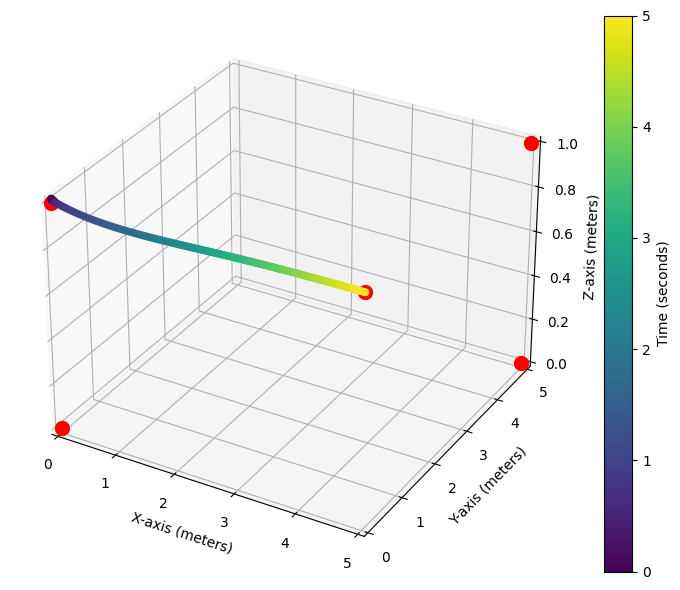

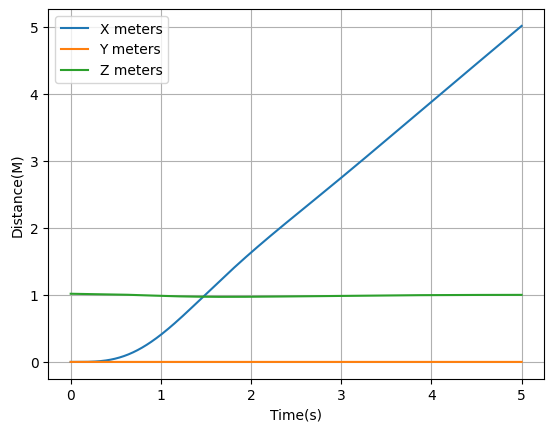

In [16]:
steps = 500
time = 5
t = np.linspace(0, time, steps)

state_out, x_out, y_out, z_out, vx_out, vy_out, vz_out, phi_out, theta_out, psi_out, omega_x_out, omega_y_out, omega_z_out, omega_m1_out, omega_m2_out, omega_m3_out, omega_m4_out = sim(state0,t, derivs)


In [17]:
energy1 = 0
power_total = 0
for i in range(len(x_out)):
    state_desired  =np.array(
   [[state_out[i,0]+1.39],
   [0.        ],
   [1.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [93.0310849898583],
   [93.0310849898583],
   [93.0310849898583],
   [93.0310849898583]])
    tau = controller.run(state_out[i], state_desired)
    tau_m1,tau_m2,tau_m3,tau_m4 =  tau
    power = (np.abs(tau_m1*omega_m1_out[i] / efficiency(tau_m1)) + np.abs(tau_m2*omega_m2_out[i] / efficiency(tau_m2))
    + np.abs(tau_m3*omega_m3_out[i] / efficiency(tau_m3)) + np.abs(tau_m4*omega_m4_out[i] / efficiency(tau_m4) ) )
    power_total += power
    energy1 = power_total * (time/steps)

In [18]:
state_out[-1], energy_total + energy1

(array([ 5.01625859e+00, -4.88233789e-06,  1.00097600e+00,  1.13103709e+00,
         2.99943925e-06,  1.09704376e-03, -2.13010363e-06,  1.34823537e-04,
         9.08837781e-06,  6.02593569e-06,  1.05633891e-03,  6.15739737e-06,
         9.30186389e+01,  9.30151020e+01,  9.30118991e+01,  9.30151012e+01]),
 455.9342579181158)

## Stop

In [19]:
state0 = state_out[-1]
energy_total =  energy_total + energy1

In [20]:
state_desired  =np.array(
   [[5.],
   [0.        ],
   [1.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [93.0310849898583],
   [93.0310849898583],
   [93.0310849898583],
   [93.0310849898583]])
def derivs(state, K, state_desired = state_desired):
  x, y, z, vx, vy, vz, phi, theta,  psi, omega_x, omega_y, omega_z ,omega_m1 ,omega_m2, omega_m3, omega_m4 = (state)
  tau = controller.run(state, state_desired)
  tau_m1,tau_m2,tau_m3,tau_m4 =  tau
  F  = np.array([vx, vy, vz,
        k*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
       -k*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
       (g*m + k*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)*cos(phi)*cos(theta))/m,
        omega_x,omega_y, omega_z,
       (-I_xx*I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi)*tan(theta) - I_xx*I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi)*tan(theta) - I_yy*I_zz*k*l*(omega_m2**2 - omega_m4**2))/(I_xx*I_yy*I_zz),
       (I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*sin(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*cos(phi))/(I_yy*I_zz),
       (-I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi))/(I_yy*I_zz*cos(theta)),
       (-b*omega_m1**2 + tau_m1)/I_m,
       (-b*omega_m2**2 + tau_m2)/I_m,
       (-b*omega_m3**2 + tau_m3)/I_m,
       (-b*omega_m4**2 + tau_m4)/I_m]).astype(float)
  return F

<Figure size 640x480 with 0 Axes>

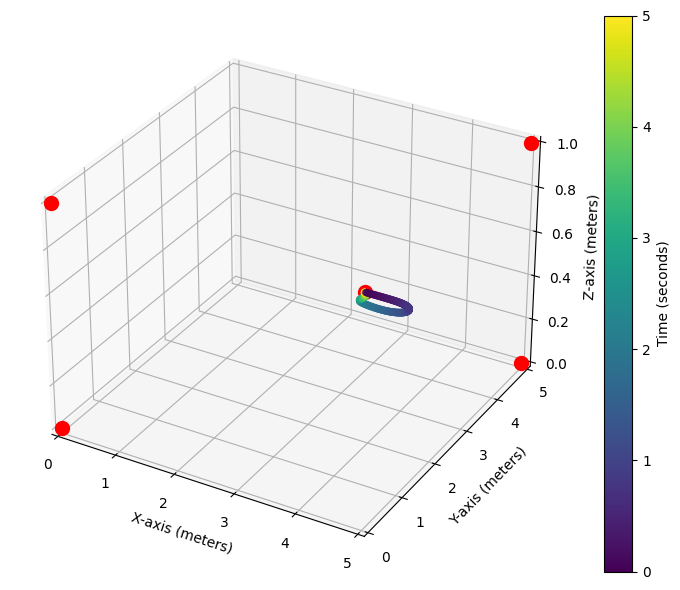

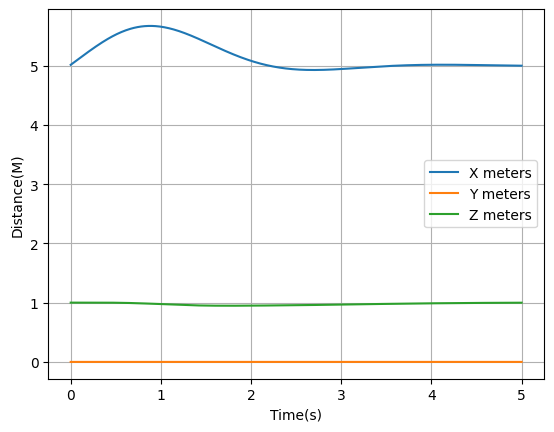

In [21]:
steps = 500
time = 5
t = np.linspace(0, time, steps)

state_out, x_out, y_out, z_out, vx_out, vy_out, vz_out, phi_out, theta_out, psi_out, omega_x_out, omega_y_out, omega_z_out, omega_m1_out, omega_m2_out, omega_m3_out, omega_m4_out = sim(state0,t,derivs)

In [22]:
state_out.T[:,-1], energy_total+ energy(state_out,state_desired,time, steps), energy(state_out,state_desired,time, steps)

(array([ 5.00122826e+00,  1.45580514e-05,  9.99703253e-01, -1.81944048e-02,
         2.88318019e-06,  5.08344859e-03,  9.17276727e-06,  3.06768481e-03,
         4.54352592e-06, -1.81869574e-05,  4.01397110e-03,  1.53603513e-05,
         9.30120903e+01,  9.29913732e+01,  9.29711056e+01,  9.29913558e+01]),
 685.3491227808571,
 229.4148648627413)

## Yaw 90 degrees to the left

In [23]:
state0 = state_out[-1]
energy_total =  energy_total+ energy(state_out,state_desired,time, steps) #685.3491227808571

In [24]:
def derivs(state, K):
  x, y, z, vx, vy, vz, phi, theta,  psi, omega_x, omega_y, omega_z ,omega_m1 ,omega_m2, omega_m3, omega_m4 = (state)
  state_desired  =np.array(
   [[5.       ],
   [0.        ],
   [1.        ],
   [0.        ],
   [0.        ],
   [0.       ],
   [0.       ],
   [0.        ],
   [state[8]+ 0.07 ],
   [0.        ],
   [0.        ],
   [0.        ],
   [93.0310849898583],
   [93.0310849898583],
   [93.0310849898583],
   [93.0310849898583]])
  tau = controller.run(state, state_desired)
  tau_m1,tau_m2,tau_m3,tau_m4 =  tau
  F  = np.array([vx, vy, vz,
        k*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
       -k*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
       (g*m + k*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)*cos(phi)*cos(theta))/m,
        omega_x,omega_y, omega_z,
       (-I_xx*I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi)*tan(theta) - I_xx*I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi)*tan(theta) - I_yy*I_zz*k*l*(omega_m2**2 - omega_m4**2))/(I_xx*I_yy*I_zz),
       (I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*sin(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*cos(phi))/(I_yy*I_zz),
       (-I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi))/(I_yy*I_zz*cos(theta)),
       (-b*omega_m1**2 + tau_m1)/I_m,
       (-b*omega_m2**2 + tau_m2)/I_m,
       (-b*omega_m3**2 + tau_m3)/I_m,
       (-b*omega_m4**2 + tau_m4)/I_m]).astype(float)
  return F

<Figure size 640x480 with 0 Axes>

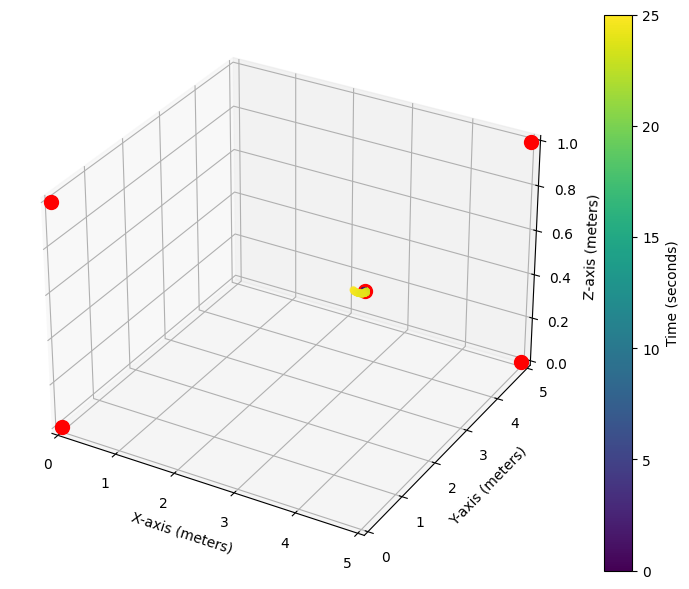

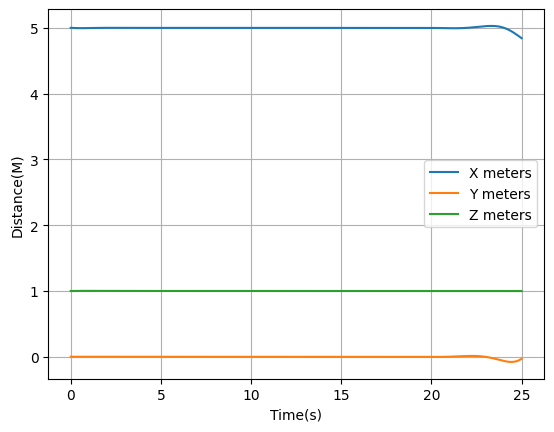

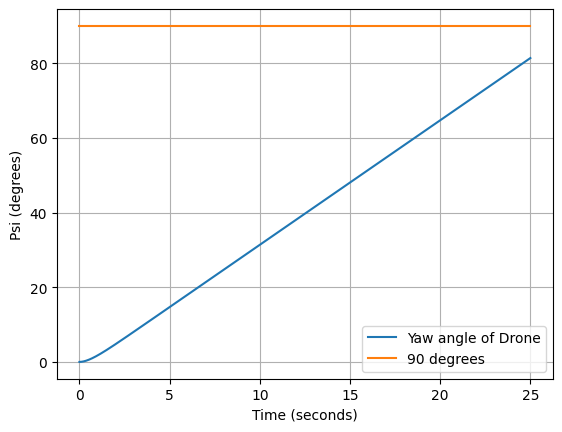

In [25]:
time = 25
steps = 600
t = np.linspace(0, time, steps)
ones = np.ones_like(t)
state_out, x_out, y_out, z_out, vx_out, vy_out, vz_out, phi_out, theta_out, psi_out, omega_x_out, omega_y_out, omega_z_out, omega_m1_out, omega_m2_out, omega_m3_out, omega_m4_out = sim(state0,t, derivs)

def psiplot(t,psi_out):
    psi_degrees = psi_out * 180 / np.pi
    plt.plot(t, psi_degrees, label='Yaw angle of Drone')
    plt.plot(t, ones * 90, label='90 degrees')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Psi (degrees)')
    plt.legend()
    plt.grid(True)
    plt.show()
    pass
psiplot(t,psi_out)

In [26]:
energy1 = 0
power_total = 0
for i in range(len(x_out)):
    state_desired  =np.array(
    [[5.       ],
    [0.        ],
    [1.        ],
    [0.        ],
    [0.        ],
    [0.       ],
    [0.       ],
    [0.        ],
    [state_out[i,8]+ 0.04 ],
    [0.        ],
    [0.        ],
    [0.        ],
    [93.0310849898583],
    [93.0310849898583],
    [93.0310849898583],
    [93.0310849898583]])
    tau = controller.run(state_out[i], state_desired)
    tau_m1,tau_m2,tau_m3,tau_m4 =  tau
    power = (np.abs(tau_m1*omega_m1_out[i] / efficiency(tau_m1)) + np.abs(tau_m2*omega_m2_out[i] / efficiency(tau_m2))
    + np.abs(tau_m3*omega_m3_out[i] / efficiency(tau_m3)) + np.abs(tau_m4*omega_m4_out[i] / efficiency(tau_m4) ) )
    power_total += power
    energy1 = power_total * (time/steps)

In [27]:
state_out.T[:,-1]  ,energy_total + energy1, psi_out[-1], np.pi/2, energy1

(array([ 4.84361145e+00, -2.99421826e-02,  9.98702441e-01, -1.90276258e-01,
         1.92491593e-01, -2.35306721e-03,  1.89850113e-03,  4.59970129e-02,
         1.42055818e+00,  6.61949861e-02,  4.04776930e-02,  5.80996472e-02,
         9.31018296e+01,  9.29644945e+01,  9.30157189e+01,  9.31561439e+01]),
 1823.160080881672,
 1.4205581785771653,
 1.5707963267948966,
 1137.810958100815)

## Stop


In [28]:
state0 = state_out[-1]
energy_total =  energy_total + energy1
energy_total

1823.160080881672

### Rebuild the controller around the new equilibrium point

In [29]:
x, y, z, vx, vy, vz, phi, theta, psi , omega_x,omega_y, omega_z,omega_m1 ,omega_m2, omega_m3, omega_m4 = symbols('x, y, z, vx, vy, vz, phi, theta, psi , omega_x,omega_y, omega_z, omega_m1 ,omega_m2, omega_m3, omega_m4')
tau_m1,tau_m2,tau_m3,tau_m4 = symbols('tau_m1,tau_m2,tau_m3,tau_m4')

states = [x, y, z, vx, vy, vz, phi, theta, psi, omega_x,omega_y, omega_z, omega_m1, omega_m2, omega_m3, omega_m4]
inputs = [tau_m1,tau_m2,tau_m3,tau_m4]

F  = Matrix([vx, vy, vz,
            k*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
           -k*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
           (g*m + k*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)*cos(phi)*cos(theta))/m,
            omega_x,omega_y, omega_z,
           (-I_xx*I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi)*tan(theta) - I_xx*I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi)*tan(theta) - I_yy*I_zz*k*l*(omega_m2**2 - omega_m4**2))/(I_xx*I_yy*I_zz),
           (I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*sin(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*cos(phi))/(I_yy*I_zz),
           (-I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi))/(I_yy*I_zz*cos(theta)),
           (-b*omega_m1**2 + tau_m1)/I_m,
           (-b*omega_m2**2 + tau_m2)/I_m,
           (-b*omega_m3**2 + tau_m3)/I_m,
           (-b*omega_m4**2 + tau_m4)/I_m]).T

# find equalibrium
Fe = F.subs({x : 0,y : 0 , z : 0,vx : 0,vy : 0, vz : 0,  phi : 0, theta : 0, psi : pi/2, omega_x:0 ,omega_y:0 , omega_z:0})
eq = Eq(Fe[5],0)
eq1 = Eq(Fe[6],0)
eq2 = Eq(Fe[7],0)
eq3 = Eq(Fe[8],0)
eq4 = Eq(Fe[12],0)
eq5 = Eq(Fe[13],0)
eq6 = Eq(Fe[14],0)
eq7 = Eq(Fe[15],0)
eq8 = Eq(tau_m1, tau_m2)
eq9 = Eq(tau_m3, tau_m4)
eq10 = Eq(tau_m1, tau_m3)
solution = solve([eq,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10])[15]
subsitution1 = solution
subsitution2 = {x : 0,y : 0 , z : 0,vx : 0,vy : 0, vz : 0,  phi : 0, theta : 0, psi : pi/2, omega_x:0 ,omega_y:0 , omega_z:0}
Fe = Fe.subs(subsitution1).subs(subsitution2)
print(Fe)
A = F.jacobian(states)
B = F.jacobian(inputs)
A = F.jacobian(states)
B = F.jacobian(inputs)
A = A.subs(subsitution1).subs(subsitution2)
B = B.subs(subsitution1).subs(subsitution2)
A = np.array(A).astype(float)
B = np.array(B).astype(float)
inputs_e  =  np.array(Matrix(inputs).subs(subsitution1).subs(subsitution2)).astype(float)
state_e  = np.array(Matrix(states).subs(subsitution1).subs(subsitution2)).astype(float)
Q = np.diag([10,10,200,1,1,1,1,1,100,1,1,10,1,1,1,1])
R = np.eye(4)*10
K = LQR(A, B, Q, R)


Matrix([[0, 0, 0, 0, 0, -8.88178419700125e-15, 0, 0, 0, 0, 0, 0, 2.72848410531878e-12, 2.72848410531878e-12, 2.72848410531878e-12, 2.72848410531878e-12]])


In [30]:
state_desired  =np.array(
   [[5.       ],
   [0.        ],
   [1.        ],
   [0.        ],
   [0.        ],
   [0.       ],
   [0.       ],
   [0.        ],
   [np.pi/2      ],
   [0.        ],
   [0.        ],
   [0.        ],
   [93.0310849898583],
   [93.0310849898583],
   [93.0310849898583],
   [93.0310849898583]])
def derivs(state, K, state_desired= state_desired):
  x, y, z, vx, vy, vz, phi, theta,  psi, omega_x, omega_y, omega_z ,omega_m1 ,omega_m2, omega_m3, omega_m4 = (state)

  tau = controller.run(state, state_desired)
  tau_m1,tau_m2,tau_m3,tau_m4 =  tau
  F  = np.array([vx, vy, vz,
        k*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
       -k*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
       (g*m + k*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)*cos(phi)*cos(theta))/m,
        omega_x,omega_y, omega_z,
       (-I_xx*I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi)*tan(theta) - I_xx*I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi)*tan(theta) - I_yy*I_zz*k*l*(omega_m2**2 - omega_m4**2))/(I_xx*I_yy*I_zz),
       (I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*sin(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*cos(phi))/(I_yy*I_zz),
       (-I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi))/(I_yy*I_zz*cos(theta)),
       (-b*omega_m1**2 + tau_m1)/I_m,
       (-b*omega_m2**2 + tau_m2)/I_m,
       (-b*omega_m3**2 + tau_m3)/I_m,
       (-b*omega_m4**2 + tau_m4)/I_m]).astype(float)
  return F

<Figure size 640x480 with 0 Axes>

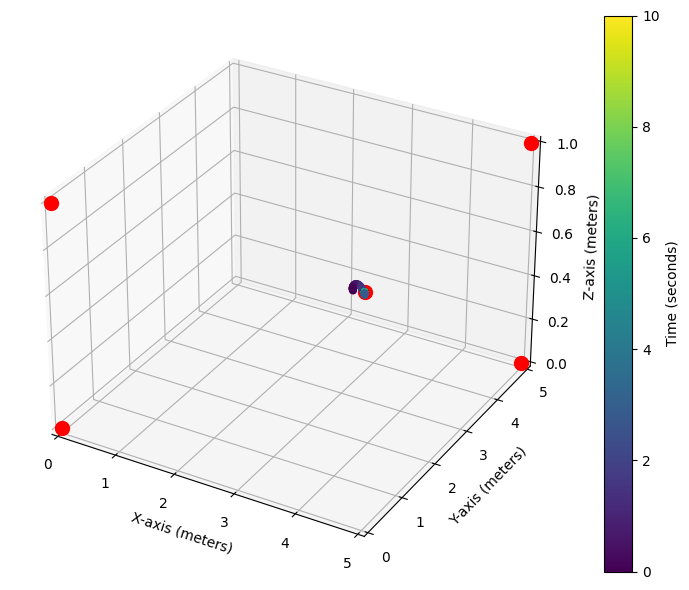

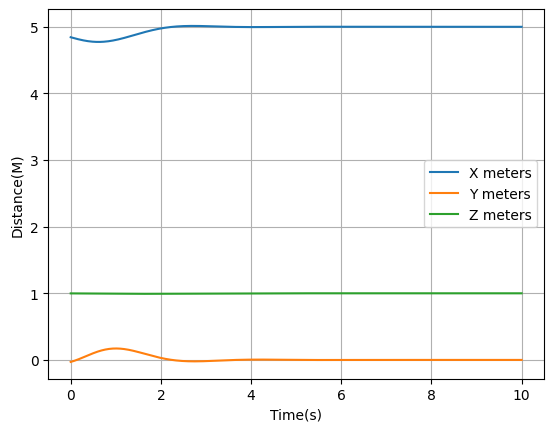

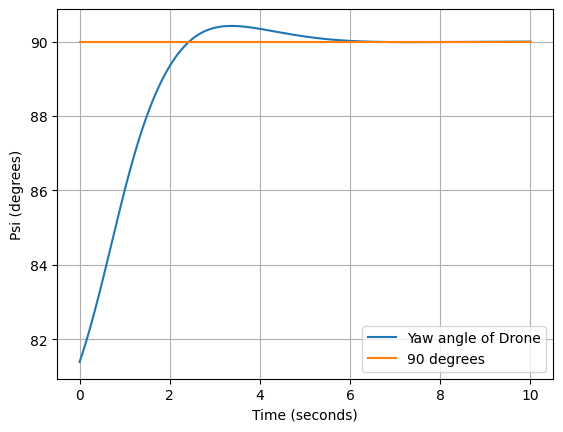

In [31]:
time =10
steps = 600
t = np.linspace(0, time, steps)

state_out, x_out, y_out, z_out, vx_out, vy_out, vz_out, phi_out, theta_out, psi_out, omega_x_out, omega_y_out, omega_z_out, omega_m1_out, omega_m2_out, omega_m3_out, omega_m4_out = sim(state0,t, derivs)

psiplot(t,psi_out)

In [32]:
energy1 = 0
power_total = 0
for i in range(len(x_out)):
    state_desired  =np.array(
       [[5.       ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.       ],
       [0.       ],
       [0.        ],
       [np.pi/2      ],
       [0.        ],
       [0.        ],
       [0.        ],
       [93.0310849898583],
       [93.0310849898583],
       [93.0310849898583],
       [93.0310849898583]])
    tau = controller.run(state_out[i], state_desired)
    tau_m1,tau_m2,tau_m3,tau_m4 =  tau
    power = (np.abs(tau_m1*omega_m1_out[i] / efficiency(tau_m1)) + np.abs(tau_m2*omega_m2_out[i] / efficiency(tau_m2))
    + np.abs(tau_m3*omega_m3_out[i] / efficiency(tau_m3)) + np.abs(tau_m4*omega_m4_out[i] / efficiency(tau_m4) ) )
    power_total += power
    energy1 = power_total * (time/steps)

In [33]:
state_out[-1], energy_total +energy1, energy1

(array([ 4.99998988e+00,  1.15695697e-05,  9.99990971e-01,  6.25605319e-08,
         9.66046772e-06,  4.40299700e-06,  5.68892749e-06, -8.51660295e-06,
         1.57078759e+00, -1.15797581e-05,  1.18376899e-05,  3.61670263e-05,
         9.30312770e+01,  9.30309361e+01,  9.30313147e+01,  9.30309231e+01]),
 2280.5122637346312,
 457.3521828529594)

## Move foreward another 5m at 1m/s

In [34]:
state0 = state_out[-1]
energy_total = energy_total +energy1
energy_total

2280.5122637346312

In [35]:
def derivs(state, K):
  x, y, z, vx, vy, vz, phi, theta,  psi, omega_x, omega_y, omega_z ,omega_m1 ,omega_m2, omega_m3, omega_m4 = (state)
  state_desired  =np.array(
   [[5.  ],
   [state[1]+1.39      ],
   [1.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [np.pi/2        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [93.0310849898583],
   [93.0310849898583],
   [93.0310849898583],
   [93.0310849898583]])
  tau = controller.run(state, state_desired)
  tau_m1,tau_m2,tau_m3,tau_m4 =  tau
  F  = np.array([vx, vy, vz,
        k*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
       -k*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
       (g*m + k*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)*cos(phi)*cos(theta))/m,
        omega_x,omega_y, omega_z,
       (-I_xx*I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi)*tan(theta) - I_xx*I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi)*tan(theta) - I_yy*I_zz*k*l*(omega_m2**2 - omega_m4**2))/(I_xx*I_yy*I_zz),
       (I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*sin(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*cos(phi))/(I_yy*I_zz),
       (-I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi))/(I_yy*I_zz*cos(theta)),
       (-b*omega_m1**2 + tau_m1)/I_m,
       (-b*omega_m2**2 + tau_m2)/I_m,
       (-b*omega_m3**2 + tau_m3)/I_m,
       (-b*omega_m4**2 + tau_m4)/I_m]).astype(float)
  return F


<Figure size 640x480 with 0 Axes>

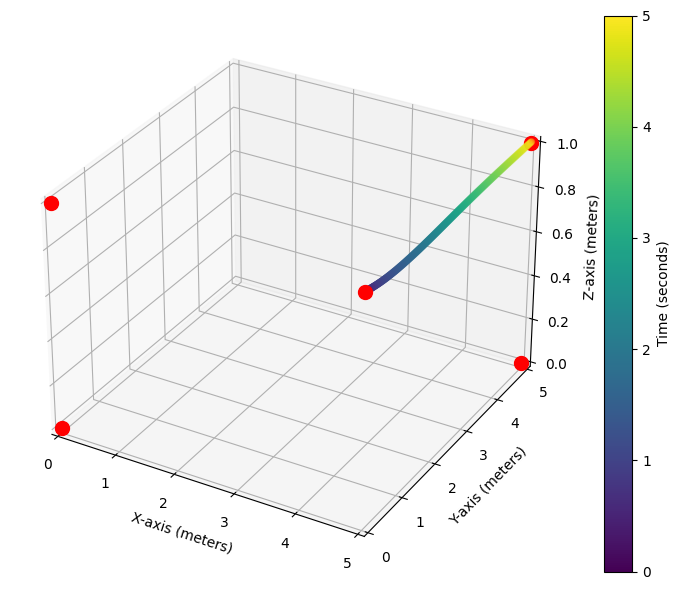

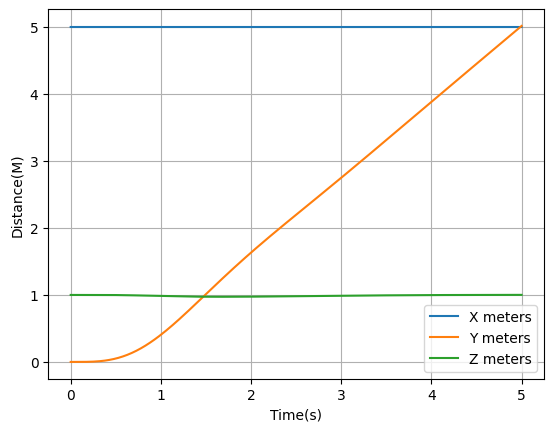

5.016137408878452

In [36]:
steps = 200
time = 5
t = np.linspace(0, time, steps)

state_out, x_out, y_out, z_out, vx_out, vy_out, vz_out, phi_out, theta_out, psi_out, omega_x_out, omega_y_out, omega_z_out, omega_m1_out, omega_m2_out, omega_m3_out, omega_m4_out = sim(state0,t, derivs)
y_out[-1]

In [37]:
energy1 = 0
power_total = 0
for i in range(len(x_out)):
    state_desired  =np.array(
    [[5.  ],
    [state_out[i,1]+1.39        ],
    [1.        ],
    [0.        ],
    [0.        ],
    [0.        ],
    [0.        ],
    [0.        ],
    [np.pi/2        ],
    [0.        ],
    [0.        ],
    [0.        ],
    [93.0310849898583],
    [93.0310849898583],
    [93.0310849898583],
    [93.0310849898583]])
    tau = controller.run(state_out[i], state_desired)
    tau_m1,tau_m2,tau_m3,tau_m4 =  tau
    power = (np.abs(tau_m1*omega_m1_out[i] / efficiency(tau_m1)) + np.abs(tau_m2*omega_m2_out[i] / efficiency(tau_m2))
    + np.abs(tau_m3*omega_m3_out[i] / efficiency(tau_m3)) + np.abs(tau_m4*omega_m4_out[i] / efficiency(tau_m4) ) )
    power_total += power
    energy1 = power_total * (time/steps)

In [38]:
state_out[-1], energy_total + energy1

(array([ 5.00000475e+00,  5.01613741e+00,  1.00098026e+00, -3.10556490e-06,
         1.13118337e+00,  8.76570132e-04, -2.03533693e-06,  1.33544083e-04,
         1.57080256e+00,  5.89162093e-06,  1.05660329e-03,  7.58300242e-06,
         9.30204025e+01,  9.30168835e+01,  9.30136807e+01,  9.30168822e+01]),
 2514.376974724779)

## Stop (hover)

In [39]:
state0 = state_out[-1]
energy_total =energy_total + energy1
energy_total

2514.376974724779

In [40]:
state_desired  =np.array(
   [[5.  ],
   [5.     ],
   [1.0       ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [np.pi/2        ],
   [0.        ],
   [0.        ],
   [0.        ],
   [93.0310849898583],
   [93.0310849898583],
   [93.0310849898583],
   [93.0310849898583]])

In [41]:
def derivs(state, K):
  x, y, z, vx, vy, vz, phi, theta,  psi, omega_x, omega_y, omega_z ,omega_m1 ,omega_m2, omega_m3, omega_m4 = (state)
  tau = controller.run(state, state_desired)
  tau_m1,tau_m2,tau_m3,tau_m4 =  tau
  F  = np.array([vx, vy, vz,
        k*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
       -k*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
       (g*m + k*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)*cos(phi)*cos(theta))/m,
        omega_x,omega_y, omega_z,
       (-I_xx*I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi)*tan(theta) - I_xx*I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi)*tan(theta) - I_yy*I_zz*k*l*(omega_m2**2 - omega_m4**2))/(I_xx*I_yy*I_zz),
       (I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*sin(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*cos(phi))/(I_yy*I_zz),
       (-I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi))/(I_yy*I_zz*cos(theta)),
       (-b*omega_m1**2 + tau_m1)/I_m,
       (-b*omega_m2**2 + tau_m2)/I_m,
       (-b*omega_m3**2 + tau_m3)/I_m,
       (-b*omega_m4**2 + tau_m4)/I_m]).astype(float)
  return F

<Figure size 640x480 with 0 Axes>

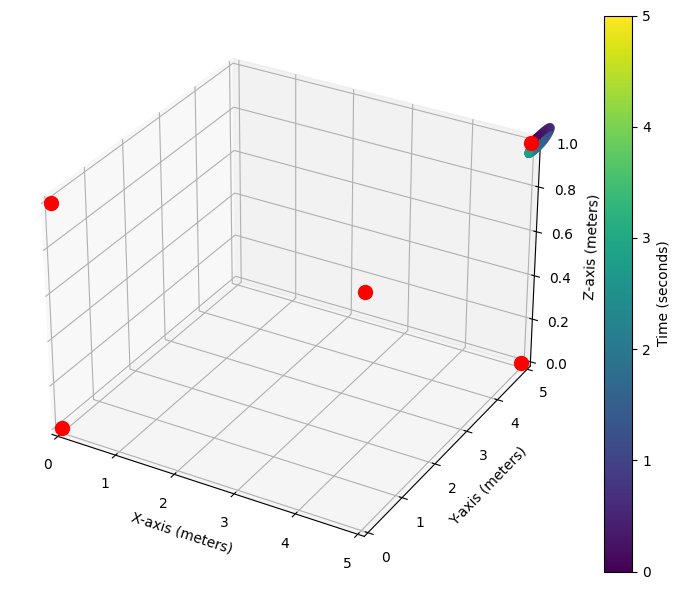

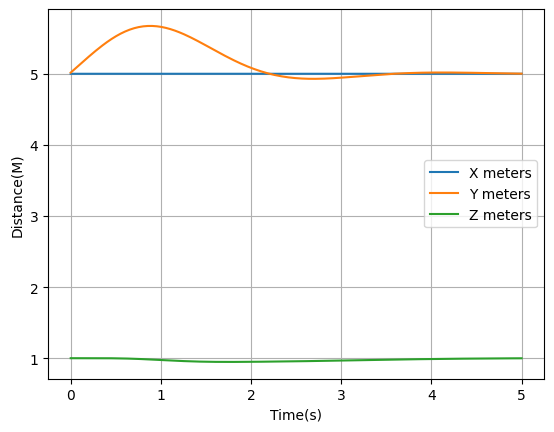

5.001223613575166

In [42]:
steps = 200
time = 5
t = np.linspace(0, time, steps)

state_out, x_out, y_out, z_out, vx_out, vy_out, vz_out, phi_out, theta_out, psi_out, omega_x_out, omega_y_out, omega_z_out, omega_m1_out, omega_m2_out, omega_m3_out, omega_m4_out = sim(state0,t, derivs)
y_out[-1]

In [43]:
def energy(state_out, state_desired, time, steps):
    power_total = 0
    energy = 0
    for i in range(len(x_out)):
        tau = controller.run(state_out[i], state_desired)
        tau_m1,tau_m2,tau_m3,tau_m4 =  tau
        power = (np.abs(tau_m1*omega_m1_out[i] / efficiency(tau_m1)) + np.abs(tau_m2*omega_m2_out[i] / efficiency(tau_m2))
        + np.abs(tau_m3*omega_m3_out[i] / efficiency(tau_m3)) + np.abs(tau_m4*omega_m4_out[i] / efficiency(tau_m4) ) )
        power_total += power
        energy = power_total * (time/steps)
    return energy
state_out[-1], energy_total+energy(state_out, state_desired, time, steps)

(array([ 4.99998523e+00,  5.00122361e+00,  9.99709069e-01, -2.74498251e-06,
        -1.81823963e-02,  5.07600926e-03,  9.21917687e-06,  3.06790154e-03,
         1.57079772e+00, -1.82788708e-05,  4.00742505e-03,  1.68383473e-05,
         9.30120955e+01,  9.29913943e+01,  9.29711273e+01,  9.29913766e+01]),
 2748.952335011255)

## Land

In [44]:
state0 = state_out[-1]
energy_total =  energy_total+energy(state_out, state_desired, time, steps) #3247.807198450192
energy_total

2748.952335011255

In [45]:
state_desired =  np.array(
      [[5.0 ],
       [5  ],
       [0.04001     ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [np.pi/2  ],
       [0.        ],
       [0.        ],
       [0.  ],
       [93.0310849898583],
       [93.0310849898583],
       [93.0310849898583],
       [93.0310849898583]]).astype(float)
def derivs(state, K):
  x, y, z, vx, vy, vz, phi, theta,  psi, omega_x, omega_y, omega_z ,omega_m1 ,omega_m2, omega_m3, omega_m4 = (state)
  tau = controller.run(state, state_desired)
  tau_m1,tau_m2,tau_m3,tau_m4 =  tau
  F  = np.array([vx, vy, vz,
        k*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
       -k*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
       (g*m + k*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)*cos(phi)*cos(theta))/m,
        omega_x,omega_y, omega_z,
       (-I_xx*I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi)*tan(theta) - I_xx*I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi)*tan(theta) - I_yy*I_zz*k*l*(omega_m2**2 - omega_m4**2))/(I_xx*I_yy*I_zz),
       (I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*sin(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*cos(phi))/(I_yy*I_zz),
       (-I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi))/(I_yy*I_zz*cos(theta)),
       (-b*omega_m1**2 + tau_m1)/I_m,
       (-b*omega_m2**2 + tau_m2)/I_m,
       (-b*omega_m3**2 + tau_m3)/I_m,
       (-b*omega_m4**2 + tau_m4)/I_m]).astype(float)
  return F

<Figure size 640x480 with 0 Axes>

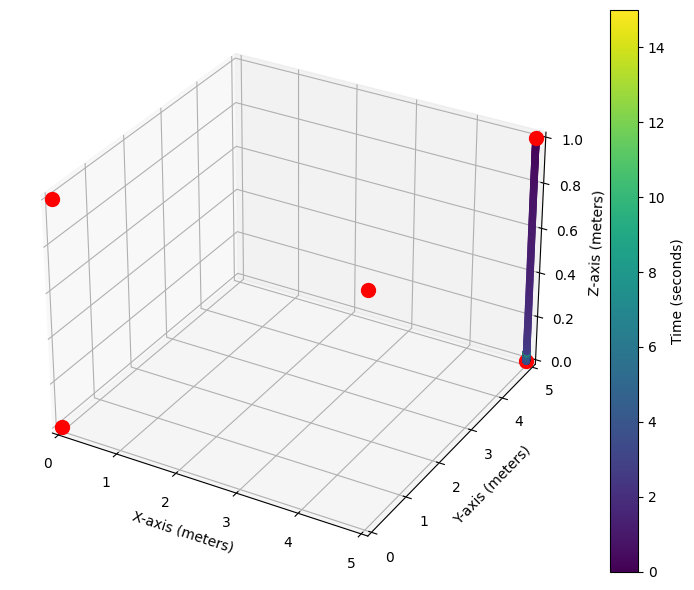

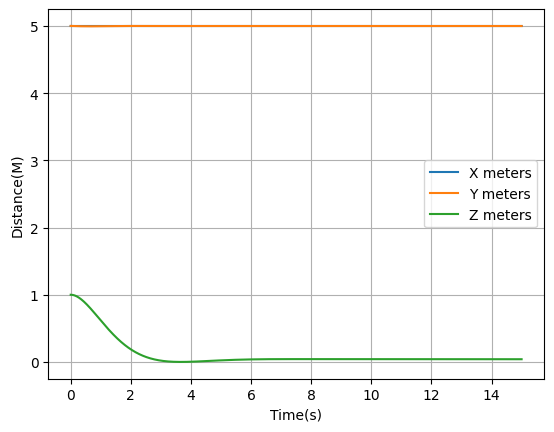

In [46]:
steps = 2000
time = 15
t = np.linspace(0, time, steps)

state_out, x_out, y_out, z_out, vx_out, vy_out, vz_out, phi_out, theta_out, psi_out, omega_x_out, omega_y_out, omega_z_out, omega_m1_out, omega_m2_out, omega_m3_out, omega_m4_out = sim(state0,t, derivs)

In [47]:
for i, z in enumerate(z_out):
    if z < 0.:
        print(vz_out[i], vz_out[i] > -0.01)

-0.0026241131124985807 True
-0.002144485854995228 True
-0.0016708856248524933 True
-0.0012032738312675814 True
-0.0007416118893319789 True
-0.00028586122376409405 True
0.00016401674219839265 True
0.0006080605989262206 True
0.001046308896053587 True
0.0014788001666641763 True
0.001905572915105013 True
0.0023266656204116243 True


In [48]:
energy_total + energy(state_out,state_desired, time,steps )

3435.4628616573827

In [49]:
-0.0026241131124985807*100

-0.26241131124985806